In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading Data

In [1]:
import pandas as pd

df = pd.read_csv("vgsales_2020.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,NaN,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,NaN,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NaN,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,NaN,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,NaN,31.37


In [5]:
# Getting some infos about the dataset
print(f'Shape of dataset: {df.shape}\n')
df.info()

Shape of dataset: (17811, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17811 entries, 0 to 17810
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          17811 non-null  int64  
 1   Name          17811 non-null  object 
 2   Platform      17811 non-null  object 
 3   Year          17811 non-null  int64  
 4   Genre         17811 non-null  object 
 5   Publisher     17773 non-null  object 
 6   Developer     1464 non-null   object 
 7   Global_Sales  17811 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.1+ MB


Quite lots of missing values for `Developer` variable, `Publisher` variable had some missing values as well.

In [3]:
df.describe()

,Rank,Year,Global_Sales
count,17811.000000,17811.000000,17811.000000
mean,8906.000000,2007.319409,0.518108
std,5141.737158,6.370235,1.522937
min,1.000000,1980.000000,0.000000
25%,4453.500000,2004.000000,0.050000
50%,8906.000000,2008.000000,0.160000
75%,13358.500000,2011.000000,0.450000
max,17811.000000,2020.000000,82.740000


### Data Visualization

#### 1. Top 20 Games of All Time by Global_Sales

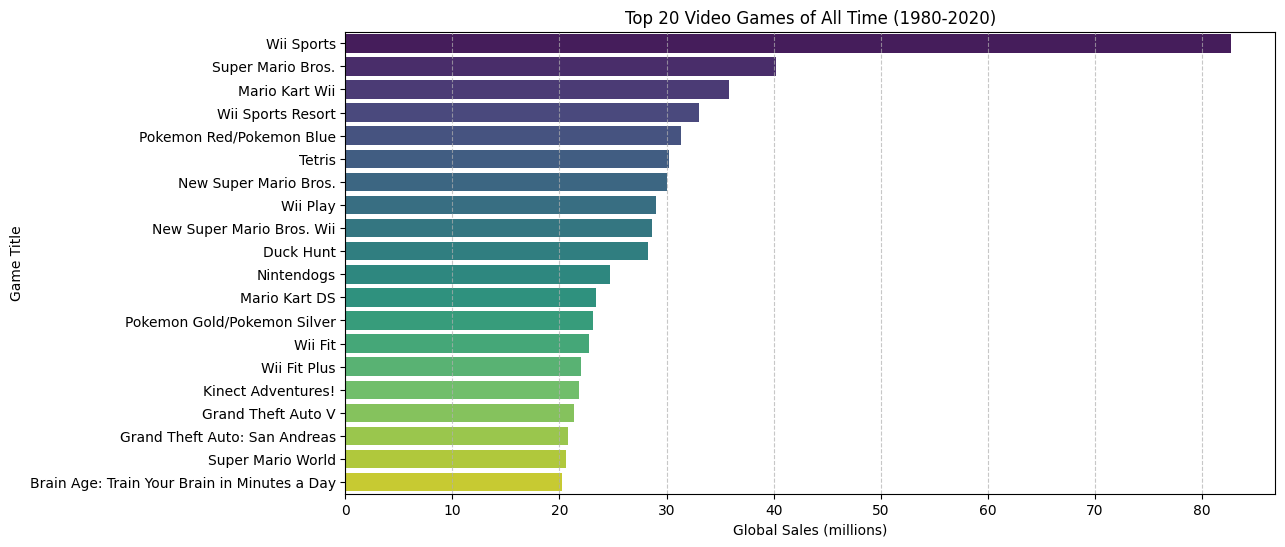

In [74]:
# Data's sorted, so we get to top 20 games by sales
top_20_games = df.nlargest(20, "Global_Sales")

# Create horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_games, x='Global_Sales', y="Name", orient='h', palette='viridis')

# Adding labels and titles
plt.xlabel("Global Sales (millions)")
plt.ylabel("Game Title")
plt.title("Top 20 Video Games of All Time (1980-2020)")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Insights:
1. Wii Sports dominated the video games market (having a global sales of ~$82 million!), followed by Super Mario Bros and Mario Kart Wii.

#### 1. Sales trend of different game genres over the years

In [8]:
# Grouping by year and genre
sales_by_year_genre = df.groupby(['Year', 'Genre']).sum().reset_index

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_58198/3936915380.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_year_genre = df.groupby(['Year', 'Genre']).sum().reset_index()


,Year,Genre,Rank,Global_Sales
0,1980,Action,5595,0.34
1,1980,Fighting,2749,0.77
2,1980,Misc,17658,2.71
3,1980,Shooter,839,7.07
4,1980,Sports,4202,0.49


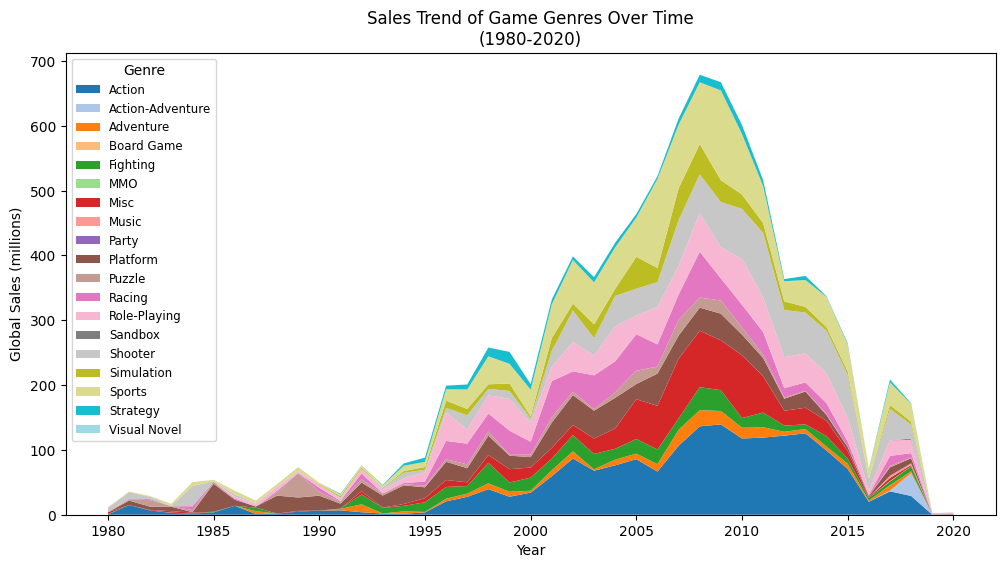

In [34]:
# Pivot the data 
pivot_data = sales_by_year_genre.pivot(index="Year", columns="Genre", values="Global_Sales")
pivot_data.fillna(0, inplace=True)

# Define a colormap since we have quite lots of genres
colormap = plt.cm.get_cmap('tab20', len(pivot_data.columns))

# Plot
plt.figure(figsize=(12, 6))
plt.stackplot(pivot_data.index, pivot_data.T, colors=[colormap(i) for i in range(len(pivot_data.columns))])
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.title("Sales Trend of Game Genres Over Time\n(1980-2020)")
plt.legend(pivot_data.columns, title="Genre", loc="upper left", fontsize="8.5")
plt.show()

Insights:
1. From this plot alone we can see the the sales of all video games boomed at around 2008
2. Looking at the sales trend by `Genre`, the top 3 game genres that dominated the sales among all the other genres are: <br>
    a. Strategy <br>
    b. Sports <br>
    c. Stimulation <br>

#### 2. Global Sales by Platform

In [40]:
# Groupby data by platform
sales_by_platform = df.groupby(['Platform']).sum().reset_index()

# Sort by sales
sales_by_platform = sales_by_platform.sort_values(by='Global_Sales', ascending=False)

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_58198/3390725885.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_platform = df.groupby(['Platform']).sum().reset_index()


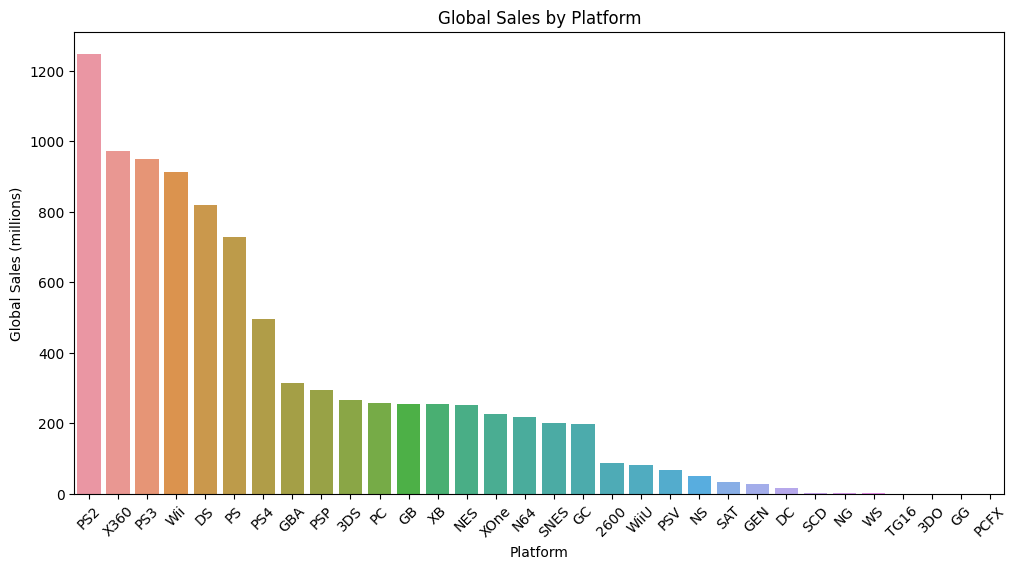

In [43]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_platform, x='Platform', y='Global_Sales')

# Rotate x labels
plt.xticks(rotation=45)

# Adding labels and tittles
plt.xlabel("Platform")
plt.ylabel("Global Sales (millions)")
plt.title("Global Sales by Platform")
plt.show()

Insights: <br>
1. The top 3 games platform that have the highest sales among all are PS2, X360 and PS3
2. Followed by Wii and DS

PS: Makes me wonder where PS5 would rank in this chart!

In [56]:
# Filter data to the most recent year
most_recent_year = df['Year'].max()
df_recent = df[df['Year'] == most_recent_year]

# Groupby Publisher
df_by_publisher = df_recent.groupby("Publisher").sum()['Global_Sales'].reset_index()

# Filter out "Unknown" category
df_by_publisher = df_by_publisher[df_by_publisher['Publisher'] != "Unknown"]

/var/folders/z1/7rqsn2ms1qdgg5wz1d2g6wv00000gn/T/ipykernel_58198/1432642904.py:8: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [60]:
# Treemap
fig = px.treemap(df_by_publisher, path=['Publisher'], values='Global_Sales', title=f'Video Game Sales by Publisher in {int(most_recent_year)}', color="Global_Sales")
fig.show()

Insights:
1. Ubisoft has the highest video game sales in 2020, owning 29% of the global sales, followed by Sony (26%) and NIS America (16%).
2. This is inline with the [article](https://www.gamesindustry.biz/43-million-games-sold-in-the-uk-in-2020-uk-annual-report) I found, stating that 43 Ubisoft sold 43 million games in the UK alone.
3. I wonder why is Nintendo's sales data is missing from the dataset, I think their sales would be in top 3 if their data existed. 